# Profitable App Profiles for the Apple App Store and Google Play Store
---
In this project we will identify the type of app that will generate the most revenue. We can refer to this type of app as "X app". X app will be free to consumers and generate its revenue from ad impressions and ad engagement. X app will also target English speakers. We also wanted to make this code reproducible so that when we receive an updated app dataset, it can be utilized.

The goal of this project is to become more comfortable working with the following python topics/concepts:
- The basics of programming in Python (arithmetical operations, variables, common data types, etc.)
- List and for loops
- Conditional statements
- Dictionaries and frequency tables
- Functions
- Jupyter Notebook

## Dataset Background
---
We will be looking at two datasets of the Apple App Store and Google Play Store. These datasets only a small sample since both app stores have over 4.5 million apps combined.

[The Apple App Store dataset](https://www.kaggle.com/lava18/google-play-store-apps) contains about 7,200 rows of app data and can be downloaded [here](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).


[Google Play Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) contains over 10,000 rows of app data. and can be downloaded [here](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).

Both of these datasets include information for app name, price, category, genre, rating, rating count and more but our focus for this analysis will be on the fields named. First we open and prepare the two CSV files. We open, read and turn the dataset into a list of lists so that we can manipulate and analyze it in Python.

In [1]:
from csv import reader

#Google Play Store dataset
openFile = open(r'C:\Users\Jason Minhas\Jupyter Projects\Profitable App Profiles for the App Store and Google Play Markets\rawData\googleplaystore.csv', encoding="utf8")
readFile = reader(openFile)
androidApps = list(readFile)

#Apple App Store dataset
openFile = open(r'C:\Users\Jason Minhas\Jupyter Projects\Profitable App Profiles for the App Store and Google Play Markets\rawData\AppleStore.csv', encoding="utf8")
readFile = reader(openFile)
appleApps = list(readFile)


It should also be noted that we decided to leave the headers in both lists. This information will come into play when we begin to iterate through both datasets. We assign the Google and Apple list of lists or dataset to <code>androidApps</code> and <code>appleApps</code> respectively.

#### exploreDataset()
In  order to explore the datasets we create the function <code>exploreData()</code> and ask for four parameters; the dataset, starting index number, ending index number and a boolean data type to give the user the option to display total number of rows and columns in dataset.

In [3]:
def exploreData(dataset, start, end, rowColumnCount=False):
    datasetSlice = dataset[start:end]    
    for row in datasetSlice:
        print(row)

    if rowColumnCount:
        print('\n')
        print('Total rows:', len(dataset))
        print('Total columns:', len(dataset[0]))

Below we explore the two datasets using the function we created above. First we start with the Google Play Store dataset.

In [4]:
exploreData(androidApps,0,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', '7-Jan-18', '1.0.0', '4.0.3 and up']
['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', '15-Jan-18', '2.0.0', '4.0.3 and up']


Total rows: 10842
Total columns: 13


Now we explore the Apple App Store dataset.

In [5]:
exploreData(appleApps,0,3,True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', 'Facebook', '389879808', 'USD', '0', '2974676', '212', '3.5', '3.5', '95', '4+', 'Social Networking', '37', '1', '29', '1']
['389801252', 'Instagram', '113954816', 'USD', '0', '2161558', '1289', '4.5', '4', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Total rows: 7198
Total columns: 16


We can see that the columns for both datasets do not align. The Google dataset has its app name in the first column (index 0) whereas the Apple dataset has its app name in the second column (index 1). This means that any function created moving forward will need dynamic parameters so we can enter the index arguments that are unique to each dataset.

#### searchCol()
We created a <code>searchCol()</code> function so that we can track duplicates and any data points that are blank.

In [105]:
def searchCol(dataset, index, searchItem, start=0, end=None):
    if end == None:
        end == len(dataset)

    for item in dataset[start:end]:
        if item[index] == searchItem:
            print(item)

Below we search for spaces using <code>searchCol()</code>. We searched the app name column for Instagram and you can see that there are duplicates for this app. We can also see that there are two apps with empty data points in the "Content Rating" and "Current Ver" column. Additionally the app named "Life Made WI-Fi Touchscreen Photo Frame" has "Everyone" under the "Price" column when it should be a number displayed as a string. We will address this in the Data Cleaning section.

In [106]:
print(androidApps[0])
searchCol(androidApps, 0, "Instagram")
searchCol(androidApps, 8, "")
searchCol(androidApps, 11, "")

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '31-Jul-18', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '31-Jul-18', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '31-Jul-18', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '31-Jul-18', 'Varies with device', 'Varies with device']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', '11-Feb-18', '1.0.19', '4.0 and up', '']
['Market Update Hel

Now we explore the Apple dataset. We search for two apps that we knew were duplicates by looking at the [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) for the dataset.

In [8]:
print(appleApps[0])
searchCol(appleApps, 1, "Mannequin Challenge")
searchCol(appleApps, 1, "VR Roller Coaster")

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['1173990889', 'Mannequin Challenge', '109705216', 'USD', '0', '668', '87', '3', '3', '1.4', '9+', 'Games', '37', '4', '1', '1']
['1178454060', 'Mannequin Challenge', '59572224', 'USD', '0', '105', '58', '4', '4.5', '1.0.1', '4+', 'Games', '38', '5', '1', '1']
['952877179', 'VR Roller Coaster', '169523200', 'USD', '0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']
['1089824278', 'VR Roller Coaster', '240964608', 'USD', '0', '67', '44', '3.5', '4', '0.81', '4+', 'Games', '38', '0', '1', '1']


Knowing the rows that are missing data or some of the apps that are duplicate will allow me to quality check my cleaning functions for accuracy later on.

## Data Cleaning
---
We must clean the data before we can analyze the data to find characteristics of X app. We mentioned how the Google dataset has some apps with missing datapoints. Missing data is the first item we'll address in the dataset cleanup.

### Missing Datapoints

#### hasBlank() & removeRowsWithMissingData()
Below we start by creating a function that will check to see if a row <code>hasBlank()</code> and returns a boolean. <code>hasBlank()</code> will check to see is and item within the row or list has a blank value. This function will be used in the function below it called <code>removeRowsWithMissingData()</code>. <code>removeRowsWithMissingData()</code> takes 2 arguments; dataset and <code>hasHeader</code>. <code>hasHeader</code> is required in case the dataset still has its header which in our case it does. When iterating through the rows we don't want to include the header. <code>removeRowsWithMissingData()</code> will iterate through every list of lists and run the <code>hasBlank()</code> function on it to see if there are any blank elements. If there is a blank element then we will not add that row into our <code>cleanDataset</code>. If every element is not blank then the list gets added to our <code>cleanDataset</code>. We return the <code>cleanDataset</code>.

In [9]:
def hasBlank(row):
    for colIndex in range(0,len(row)):
        while row[colIndex] != '':
            break
        else:
            return True
    return False

def removeRowsWithMissingData(dataset, hasHeader=True):
    if hasHeader:
        start = 1
    start = 0
        
    cleanDataset = []
        
    for row in dataset[start:]:
        if hasBlank(row):
            pass  
        else:
            cleanDataset.append(row)
            
    return cleanDataset

androidApps1 = removeRowsWithMissingData(androidApps)
appleApps1 = removeRowsWithMissingData(appleApps)

exploreData(androidApps1,0,3,True)
print('\n')
exploreData(appleApps1,0,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', '7-Jan-18', '1.0.0', '4.0.3 and up']
['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', '15-Jan-18', '2.0.0', '4.0.3 and up']


Total rows: 10840
Total columns: 13


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', 'Facebook', '389879808', 'USD', '0', '2974676', '212', '3.5', '3.5', '95', '4+', 'Social Networking', '37', '1', '29', '1']
['389801252', 'Instagram', '113954816', 'USD', '0', '2161558', '1289', '4.5', '4', '10.23', '12+

We can see that the total row number decreased for Google apps from 10842 to 10840 indicating that there were two apps that had missing data. The Apple dataset did not have any missing datapoints since the row count has not changed. It should be noted that we did not replace over the original dataset of <code>androidApps</code> and <code>appleApps</code>. Instead we created a new variable and assigned the output of the <code>removeRowsWithMissingData()</code> function to <code>androidApps1</code> and <code>appleApps1</code>. We will continue using this same technique so that we can track all the changes being made.

### Removing Duplicates

Now that we have removed the rows with missing data we can address any duplicates. Earlier we used the <code>searchCol()</code> function and saw that the "Instagram" app has duplicates. The next function will give us better visibility on the duplicates we're working with.

#### dupeCount()

<code>dupeCount()</code> is a function that will allow us to see how many duplicates there are in a certain column, with the parameter index, of a dataset. We return a count of duplicates, uniques and the total amount. This function will be used to help us check the accuracy of the function that will remove the duplicates.

In [10]:
def dupeCount(dataset, index):
    UNQItems = []
    dupeItems = []
    for item in dataset:
        if item[index] in UNQItems:
            dupeItems.append(item[index])
        else:
            UNQItems.append(item[index])     
    print('Unique Apps = ' + str(len(UNQItems)))
    print('Duplicate Apps = ' + str(len(dupeItems)))
    print('Total Apps = ' + str(len(dupeItems)+len(UNQItems)))

dupeCount(androidApps1,0)
print('\n')
dupeCount(appleApps1,1)

Unique Apps = 9659
Duplicate Apps = 1181
Total Apps = 10840


Unique Apps = 7196
Duplicate Apps = 2
Total Apps = 7198


The Google Dataset has 1,181 duplicate app names and Apple dataset only has 2. We had confirmed the two duplicates for the Apple dataset when we used the <code>searchCol()</code> function earlier.

#### removeDuplicates()

Now that we are able to track how many duplicates a dataset has we can keep just one of the rows and remove the other rows with the same name. In this scenario we want to keep the row that is most up to date but we don't have a date stamp of when the information for a specific app was collected. We know that there is a correlation between time and review count with very few exceptions. There will rarely be an instance where an app has a lower count of review then the previous day. Therefore we will keep the app with the highest review count.

This function takes 4 arguments:
    1. dataset: The dataset we are manipulating.
    2. nameIndex: The index that stores the app name.
    3. reviewCountIndex: The index that stores the review count number.
    4. hasHeader: Enter True or False to indicate whether dataset has header.

We begin by copying the dataset so that we don't overwrite it when using the function. We then sort the entire dataset from highest to lowest on the review count field which is index number 3 <code>androidApps1</code> for and 5 for <code>appleApps1</code>. We create an empty list called <code>UNQApp</code> and <code>cleanDataset</code> to. We use <code>UNQApp</code> to track all the apps that have been added to <code>cleanDataset</code> already. We then iterate through the app name or each row and check to see whether that app name is not in our <code>UNQApp</code> list. If the app name is not in our <code>UNQApp</code> list then we add it to <code>cleanDataset</code>. We return the <code>cleanDataset</code> with the original header.

In [11]:
def removeDuplicates(dataset, nameIndex, reviewCountIndex, hasHeader=True):
    if hasHeader:
        start = 1
    else:
        start = 0
      
    tempDataset = dataset.copy()  
    tempDataset[start:] = sorted(tempDataset[start:], key=lambda l: int(l[reviewCountIndex]), reverse=True)

    UNQApp = []
    cleanDataset = []

    for row in tempDataset[start:]:
        appName = row[nameIndex]
        if appName not in UNQApp:
            UNQApp.append(appName)
            cleanDataset.append(row)
    
    tempDataset[start:] = cleanDataset
    return tempDataset

androidApps2 = removeDuplicates(androidApps1,0,3,hasHeader=True)
appleApps2 = removeDuplicates(appleApps1,1,5,hasHeader=True)

dupeCount(androidApps2,0)
print('\n')
dupeCount(appleApps2,1)

Unique Apps = 9659
Duplicate Apps = 0
Total Apps = 9659


Unique Apps = 7196
Duplicate Apps = 0
Total Apps = 7196


After running the <code>removeDuplicates()</code> function we can see that the new datasets, <code>androidApps2</code> and <code>appleApps2</code> do not have anymore duplicates. The last dataset cleanup left to do is separate English from non-English apps

### Isolating English Apps

So far we have removed rows with missing data and removed duplicates. The objective for the next part is to have a final list with only apps that target English speakers. Since theres no column that directly indicates whether an app is meant for English speaking users we will have to go off of the app name.

#### isEnglish()

For this function we're making the assumption that if an app name has greater then 50% English characters then the app is targeting English speakers. The <code>isEnglish()</code> will return True or False depending on if an app name has greater then 50% English characters including special characters such as ™ and 😜. This function will be used in the <code>sortEnglish()</code> function.

In [12]:
def isEnglish(string):
    engCharCount = 0
    nonEngCharCount = 0
    specialChar = ['™','😜']
    for character in string:
        if ord(character) < 127 or character in specialChar:
            engCharCount += 1
        else:
            nonEngCharCount += 1
    percentage = engCharCount/(engCharCount+nonEngCharCount)
    
    if percentage > .5:
        return True
    return False

#### sortEnglish()

In this function we will start by copying over the headers to two empty lists, <code>englishApps</code> and <code>nonEnglishApps</code>. We then iterate through the app name for each row and sort rows using the <code>sortEnglish()</code> function. If the argument for the parameter <code>returnEnglish</code> is true, which it is by default then we will return the dataset with only English apps.

In [13]:
def sortEnglish(dataset, nameIndex, returnEnglish = True, hasHeader=True):
    if hasHeader:
        start = 1
    else:
        start = 0

    englishApps = dataset[:start].copy()
    nonEnglishApps = dataset[:start].copy()
    
    for app in dataset[start:]:
        if isEnglish(app[nameIndex]):
            englishApps.append(app)
        else:
            nonEnglishApps.append(app)
                  
    if returnEnglish:
        return englishApps
    return nonEnglishApps

androidEnglishApps = sortEnglish(androidApps2, 0)
androidNonEnglishApps = sortEnglish(androidApps2, 0,False)

appleEnglishApps = sortEnglish(appleApps2, 1)
appleNonEnglishApps = sortEnglish(appleApps2, 1,False)

exploreData(androidEnglishApps,0,3,True)
print('\n')
exploreData(appleEnglishApps,0,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Facebook', 'SOCIAL', '4.1', '78158306', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '3-Aug-18', 'Varies with device', 'Varies with device']
['WhatsApp Messenger', 'COMMUNICATION', '4.4', '69119316', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Everyone', 'Communication', '3-Aug-18', 'Varies with device', 'Varies with device']


Total rows: 9633
Total columns: 13


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', 'Facebook', '389879808', 'USD', '0', '2974676', '212', '3.5', '3.5', '95', '4+', 'Social Networking', '37', '1', '29', '1']
['389801252', 'Instagram', '113954816', 'USD', '0', '2161558', '1289', '4.5',

When we explore the new androidEnglishApps and appleEnglishApps datasets we can see that the total number or rows has decreased further. Removing apps that have less then 50% English characters in their app name isn't 100% accurate and there are bound to be some apps that slip through the crack but the quality of both datasets right now are enough to begin analyzing.

## Analyzing the Data
---

To reiterate, our goal is to find the type of free app that will allow us to maximize monetization with ad impressions and ad engagement to our English speaking users. We will refer to this app as app X. App X will need to work on both Google and Apple app stores. According to an [article](https://deviceatlas.com/blog/latest-report-shows-feature-phone-use-still-widespread) posted by a organization called Device Atlas; "iOS was the clear winner where English is the first language". Therefore, during our analysis we will weigh our findings from the Apple dataset higher and consider that the initial launch of the app will be done on Apple.

### Frequency Tables
#### freqTable()
We begin by making frequency tables that will show us a count in percentage for a specific column. The function will also sort from highest percentage to lowest.

In [14]:
def freqTable(dataset, index, hasHeader = True):
    if hasHeader:
        start = 1
    else:
        start = 0
    
    dupeFreq = {}
    for item in dataset[start:]:
        if item[index] in dupeFreq:
            dupeFreq[item[index]] += 1
        else:
            dupeFreq[item[index]] = 1
    freqTotal = 0
    for item in dupeFreq:
        freqTotal += dupeFreq[item]
    for item in dupeFreq:
        dupeFreq[item] = round((dupeFreq[item]/freqTotal)*100,2)
    
    dupeFreq = {k: v for k, v in sorted(dupeFreq.items(), key=lambda item: item[1], reverse=True)}
    
    return dupeFreq

### Apple Dataset: Genre Frequency Table

Below we create a frequency table for Apple app genre column. This will allow us to see the percentage of apps there are in each genre.

In [26]:
genreTable = freqTable(appleEnglishApps,11)
 
for key in genreTable:
    print(key, "=", genreTable[key])

Games = 54.73
Entertainment = 7.33
Education = 6.65
Photo & Video = 5.51
Utilities = 3.44
Productivity = 2.71
Health & Fitness = 2.67
Music = 2.2
Social Networking = 2.02
Sports = 1.67
Lifestyle = 1.61
Shopping = 1.38
Weather = 1.09
Travel = 0.96
News = 0.93
Book = 0.92
Reference = 0.85
Business = 0.85
Finance = 0.8
Food & Drink = 0.77
Navigation = 0.47
Medical = 0.35
Catalogs = 0.08


We can see Games by far account for majority of the apps on the Apple app market at around 55%. The next three genres Entertainment, Education and Photo & Video account for about 7.33%, 6.65% and 5.51% respectively.

### Google Dataset: Genre and Category Frequency Tables

The Google dataset has a genre column similar to the Apple dataset but it also has category column. Below we use the <code>freqTable()</code> funciton for both columns.

In [27]:
categoryTable = freqTable(androidEnglishApps,1)
genreTable = freqTable(androidEnglishApps,9)
 
print('Category Frequency Table')
for key in categoryTable:
    print(key, "=", categoryTable[key])
print("\n")  
print('Genre Frequency Table')
for key in genreTable:
    print(key, "=", genreTable[key])

Category Frequency Table
FAMILY = 19.35
GAME = 9.81
TOOLS = 8.6
BUSINESS = 4.36
MEDICAL = 4.1
PERSONALIZATION = 3.9
PRODUCTIVITY = 3.88
LIFESTYLE = 3.81
FINANCE = 3.58
SPORTS = 3.37
COMMUNICATION = 3.26
HEALTH_AND_FITNESS = 2.99
PHOTOGRAPHY = 2.91
NEWS_AND_MAGAZINES = 2.62
SOCIAL = 2.48
BOOKS_AND_REFERENCE = 2.28
TRAVEL_AND_LOCAL = 2.27
SHOPPING = 2.09
DATING = 1.76
VIDEO_PLAYERS = 1.69
MAPS_AND_NAVIGATION = 1.35
FOOD_AND_DRINK = 1.16
EDUCATION = 1.1
ENTERTAINMENT = 0.9
AUTO_AND_VEHICLES = 0.88
LIBRARIES_AND_DEMO = 0.86
WEATHER = 0.82
HOUSE_AND_HOME = 0.76
EVENTS = 0.66
PARENTING = 0.62
ART_AND_DESIGN = 0.62
COMICS = 0.57
BEAUTY = 0.55


Genre Frequency Table
Tools = 8.59
Entertainment = 5.8
Education = 5.24
Business = 4.36
Medical = 4.1
Personalization = 3.9
Productivity = 3.88
Lifestyle = 3.8
Finance = 3.58
Sports = 3.44
Communication = 3.26
Action = 3.1
Health & Fitness = 2.99
Photography = 2.91
News & Magazines = 2.62
Social = 2.48
Books & Reference = 2.28
Travel & Local = 2.26
Sho

If we look at the Category Frequency Table (the first one) we can see that FAMILY has the most apps at 19.35% of total apps in the Google app market. After looking into the FAMILY category further we can see that it consists mainly of games for kids. See image below.

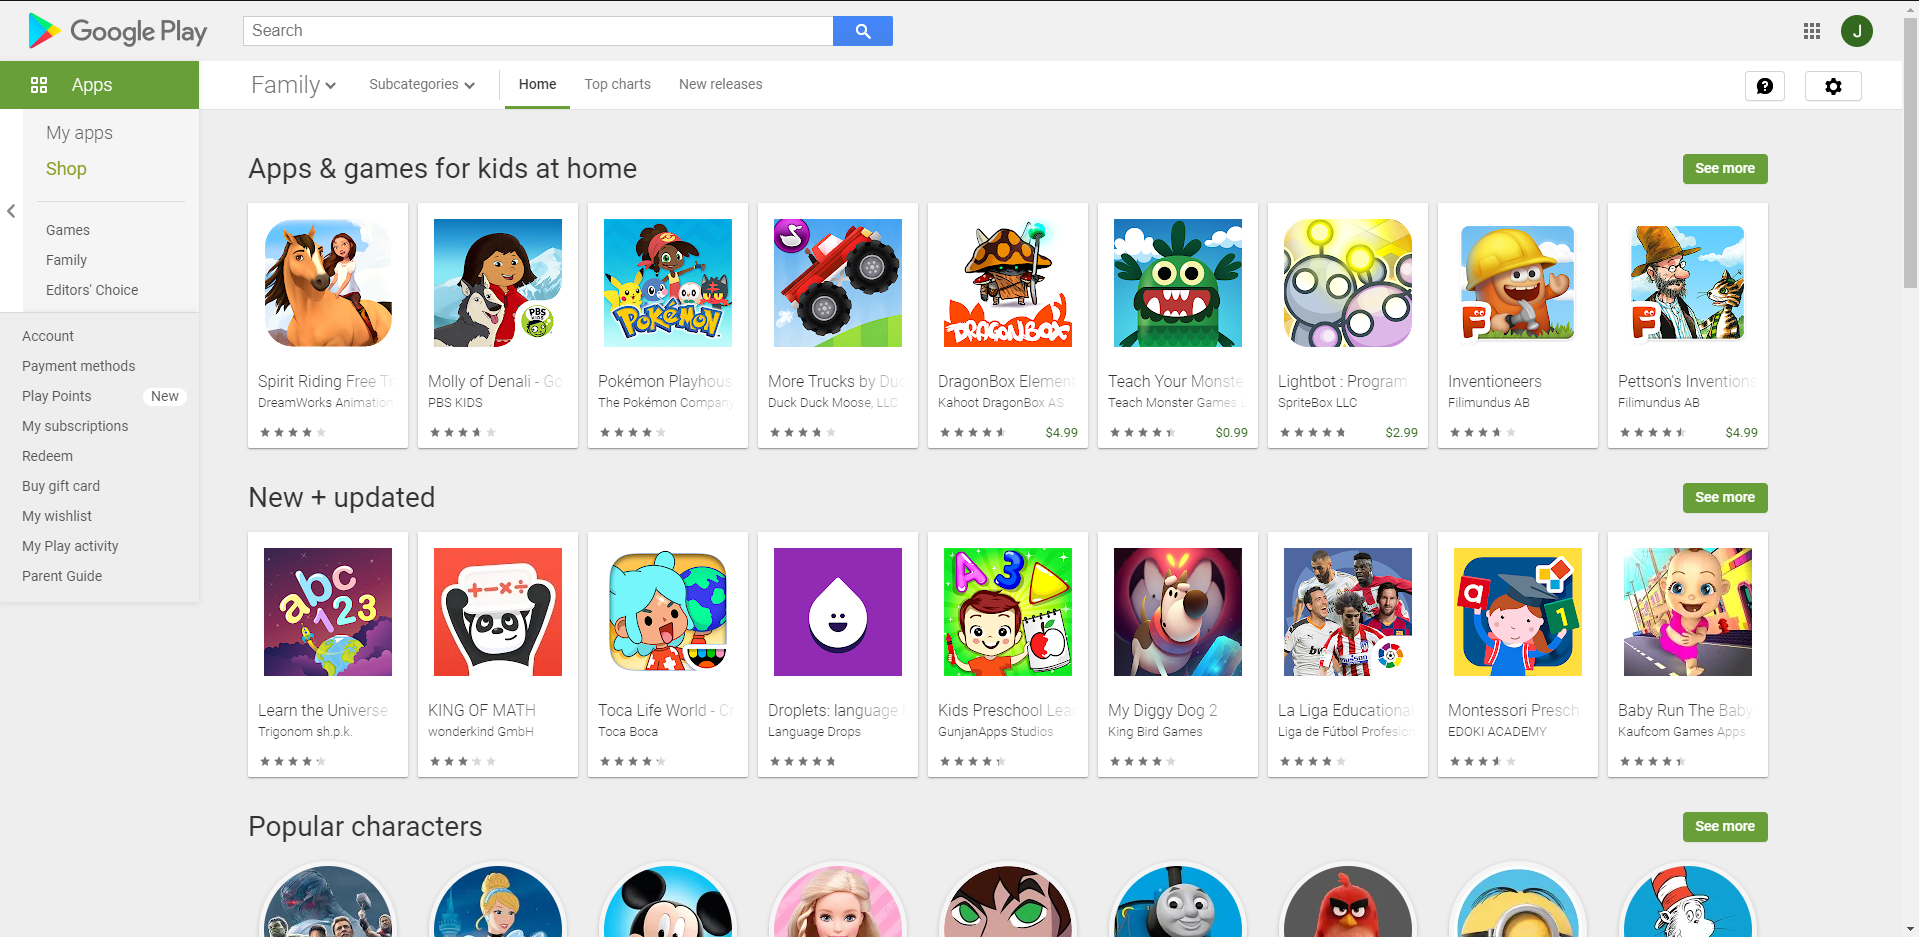

GAME comes in second at 9.81% but since we know FAMILY is essentially games for kids, its safe consider FAMILY and GAME in he same category. This means GAME makes up for 29.16% followed by Tools at 8.6%.

When looking at the Genre Frequency Table it may seem at first that Tools has the most apps but after a closer look we can see that the genres have broken the games into subcategories. For example, Action, Arcade, Puzzle, Strategy, Racing etc. For simplicity in comparison, we will focus in the using the Category column since it groups all of the subcategories of games together. 

For app X, we want too make sure we have the best chance for success. It would not be in our best interest to develop an app that is going to compete in a saturated market. App X will have to fit into a genre or category with fewer apps within its markets.

### Averages by Item

Our objective in this section is to find which genre or category has the highest number of users. Since we're monetizing via ads, the more users the better.

#### averageByItem()

This function will return a dictionary that will consist of an average number by certain column. In this case we'll want to use this function to get the average installs by genre or category.

In [43]:
def averageByItem(dataset, averageByIndex, averageOfIndex, hasHeader = True):
    if hasHeader:
        start = 1
    else:
        start = 0
        
    CountDict = {}
    averageOfDict = {}
    AvgItemDict = {}

    for row in dataset[start:]:
        replaceList = [',','+', ' ']
        averageOf = row[averageOfIndex]
        for replaceItem in replaceList:
            averageOf = averageOf.replace(replaceItem,'')  
        item = row[averageByIndex]
        if item in CountDict:
            CountDict[item] += 1
            averageOfDict[item] += int(averageOf)
        else:
            CountDict[item] = 1
            averageOfDict[item] = int(averageOf)

    for item in CountDict:
        AvgItemDict[item] = round(averageOfDict[item]/CountDict[item])

    AvgItemDict = {k: v for k, v in sorted(AvgItemDict.items(), key=lambda item: item[1], reverse=True)}
    
    return AvgItemDict

### Apple Dataset: Average Reviews by Genre

The Apple dataset doesn't include install count, so we will use reviews as an indicator for number of users. We will assume that more reviews equals more users.

In [47]:
avgReviewsByGenreApple = averageByItem(appleApps,11,5)

for genre in avgReviewsByGenreApple:
    print(str(genre) + ": " + str(avgReviewsByGenre[genre]))

Social Networking: 45499
Music: 28842
Reference: 22411
Weather: 22181
Shopping: 18615
Photo & Video: 14352
Travel: 14129
Sports: 14027
Food & Drink: 13939
Games: 13692
News: 13015
Navigation: 11854
Finance: 11048
Health & Fitness: 9913
Productivity: 8051
Entertainment: 7534
Utilities: 6864
Lifestyle: 6162
Book: 5125
Business: 4788
Education: 2239
Catalogs: 1732
Medical: 593


We can see that Social Networking has a high number of average reviews which we will assume means the apps in that genre have a high number of users.

### Google Dataset: Average Installs and Reviews by Genre

Fortunately, the Google dataset includes installs but it only gives a rough number and in a format that we must convert to an integer. An example is seen below where we explore two rows in the cleaned Google dataset. Index 5 is the installs column.

In [45]:
exploreData(androidApps,2,4,False)

['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', '15-Jan-18', '2.0.0', '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', '1-Aug-18', '1.2.4', '4.0.3 and up']


The first row has "500,000+" installs and the second row has "5,000,000+". Both values need to be cleaned by removing the "+"  and ",". In the <code>averageByItem()</code> function we have included a part the cleans these install values before continuing to add the value to a dictionary. Since we have both review and install data for each app we will use the <code>averageByItem()</code> function for both.

In [70]:
avgInstallByCategoryAndroid = averageByItem(androidEnglishApps,1,5)
avgReviewByCategoryAndroid = averageByItem(androidEnglishApps,1,3)

print('Average Install By Category')
for Category in avgInstallByCategoryAndroid:
    print(str(Category) + ": " + str(avgInstallByCategoryAndroid[Category]))
print('\n')
print('Average Reviews By Category')
for Category in avgReviewByCategoryAndroid:
    print(str(Category) + ": " + str(avgReviewByCategoryAndroid[Category]))

Average Install By Category
COMMUNICATION: 35153714
VIDEO_PLAYERS: 24121489
SOCIAL: 22961790
PHOTOGRAPHY: 16636241
PRODUCTIVITY: 15489549
GAME: 14241185
TRAVEL_AND_LOCAL: 13218663
ENTERTAINMENT: 11375402
TOOLS: 9785955
NEWS_AND_MAGAZINES: 9397670
BOOKS_AND_REFERENCE: 7572539
SHOPPING: 6966909
WEATHER: 4570893
PERSONALIZATION: 4075784
HEALTH_AND_FITNESS: 3972300
MAPS_AND_NAVIGATION: 3871399
SPORTS: 3373768
FAMILY: 3337486
FOOD_AND_DRINK: 1891060
ART_AND_DESIGN: 1887285
EDUCATION: 1782566
BUSINESS: 1659916
LIFESTYLE: 1372653
HOUSE_AND_HOME: 1331541
FINANCE: 1319851
DATING: 828971
COMICS: 817657
LIBRARIES_AND_DEMO: 626457
AUTO_AND_VEHICLES: 625061
PARENTING: 525352
BEAUTY: 513152
EVENTS: 249581
MEDICAL: 96944


Average Reviews By Category
SOCIAL: 953709
COMMUNICATION: 910267
GAME: 625156
VIDEO_PLAYERS: 414994
PHOTOGRAPHY: 377073
ENTERTAINMENT: 294930
TOOLS: 277140
SHOPPING: 221662
WEATHER: 155636
PRODUCTIVITY: 148639
PERSONALIZATION: 142402
MAPS_AND_NAVIGATION: 136378
TRAVEL_AND_LOCAL: 12

Since we ran the <code>averageByItem()</code> function on both installs and reviews, we can compare both lists to see if there is an positive correlation between reviews and install. In other words, we can confirm whether the more reviews equals the more users. For both <code>avgInstallByCategoryAndroid</code> and <code>avgReviewByCategoryAndroid</code> dictionaries there seems to be a rough positive correlation. For example, average installs places top three genres as COMMUNICATION , VIDEO_PLAYERS and SOCIAL, average reviews places top three genres as SOCIAL, COMMUNICATION and GAME- thus two overlappng categories. There's also a three for three overlap for the bottom three genres; BEAUTY, MEDICAL and EVENTS.

We know that high average installs or reviews means that there are a lot of users in that genre/category. It is important to note that average does not consider outliers. In this case, we're focusing on apps with an extremely high number of installs or reviews then the rest. Let's take look a sample of the Social Networking/SOCIAL genre/category sections for both datasets.

In [111]:
searchCol(appleEnglishApps, 11, "Social Networking",0,200)

['284882215', 'Facebook', '389879808', 'USD', '0', '2974676', '212', '3.5', '3.5', '95', '4+', 'Social Networking', '37', '1', '29', '1']
['429047995', 'Pinterest', '74778624', 'USD', '0', '1061624', '1814', '4.5', '4', '6.26', '12+', 'Social Networking', '37', '5', '27', '1']
['304878510', 'Skype for iPhone', '133238784', 'USD', '0', '373519', '127', '3.5', '4', '6.35.1', '4+', 'Social Networking', '37', '0', '32', '1']
['454638411', 'Messenger', '275729408', 'USD', '0', '351466', '892', '3', '3', '119', '4+', 'Social Networking', '37', '1', '33', '1']
['305343404', 'Tumblr', '151573504', 'USD', '0', '334293', '919', '4', '4', '8.6', '17+', 'Social Networking', '37', '5', '16', '1']
['310633997', 'WhatsApp Messenger', '135044096', 'USD', '0', '287589', '73088', '4.5', '4.5', '2.17.22', '4+', 'Social Networking', '12', '0', '35', '1']
['357218860', 'Kik', '151864320', 'USD', '0', '260965', '228', '4', '3', '11.21.0', '12+', 'Social Networking', '37', '0', '14', '0']
['428845974', 'ooVo

In [112]:
searchCol(androidEnglishApps, 1, "SOCIAL",0,200)

['Facebook', 'SOCIAL', '4.1', '78158306', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '3-Aug-18', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', '31-Jul-18', 'Varies with device', 'Varies with device']
['Snapchat', 'SOCIAL', '4', '17015352', 'Varies with device', '500,000,000+', 'Free', '0', 'Teen', 'Social', '30-Jul-18', 'Varies with device', 'Varies with device']
['Facebook Lite', 'SOCIAL', '4.3', '8606259', 'Varies with device', '500,000,000+', 'Free', '0', 'Teen', 'Social', '1-Aug-18', 'Varies with device', 'Varies with device']
['VK', 'SOCIAL', '3.8', '5793284', 'Varies with device', '100,000,000+', 'Free', '0', 'Mature 17+', 'Social', '3-Aug-18', 'Varies with device', 'Varies with device']
['Tik Tok - including musical.ly', 'SOCIAL', '4.4', '5637451', '59M', '100,000,000+', 'Free', '0', 'Teen', 'Social', '3-Aug-18', '8.0.0', '4.1 and up']
['Goo

In the Apple dataset the top two apps, Facebook and Pinterest have more reviews then all the other apps in the genre combined. Likewise in the Google dataset the top two apps, Facebook and Instagram, have more reviews then all the other apps in the category combined. The review numbers for the top apps are skewing the review averages by genre/category. 

Previously we concluded that we want to avoid genres/categories that have a a large amount of apps within them. We also don't want to compete in a genre/category that has a high number of extremely popular apps such as Social Networking/SOCIAL. 


### Standard Deviation by Item

The objective in this section is to find which genre/category has the lowest variance and therefore a lower range in user count. We want X app to be developed for a genre/category that historically performs consistently.

#### StDev()

This function returns the standard deviation of a sample given a list of values. <code>StDev()</code> willl be used in <code>StDevByItem()</code>.

In [20]:
def StDev(values):
    mean = sum(values) / len(values)
    variance = sum((i - mean) ** 2 for i in values)/(len(values)-1)    
    return variance ** (1/2)

#### StDevByItem()

Similar to <code>averageByItem()</code> this function will return a dictionary with the standard deviation of reviews or installs by genre or category.

In [56]:
def StDevByItem(dataset, StDevByIndex, StDevOfIndex, hasHeader=True):
    if hasHeader:
        start = 1
    else:
        start = 0
    
    StDevDict = {}

    for row in dataset[start:]:
        item = row[StDevByIndex]
        if item in StDevDict:
            pass
        else:
            StDevDict[item] = None  
            
    replaceList = [',','+', ' ']            
    for items in StDevDict:
        itemList = []
        for row in dataset[start:]:
            value = row[StDevOfIndex]
            for replaceItem in replaceList:
                value = value.replace(replaceItem,'')  
            item = row[StDevByIndex]
            if items == item:
                itemList.append(int(value))    
        StDevDict[items] = round(StDev(itemList),2)
        
    StDevDict = {k: v for k, v in sorted(StDevDict.items(), key=lambda item: item[1], reverse=True)}
    
    return StDevDict

### Apple Dataset: Standard Deviation of Reviews by Genre

In [83]:
reviewsStDevByGenreApple = StDevByItem(appleEnglishApps,11,5)

for genre in StDevByGenreApple:
    print(str(genre) + ": " + str(StDevByGenre[genre]))

Social Networking: 285751.39
Reference: 137211.26
Music: 129225.03
Photo & Video: 119601.04
Games: 74858.6
Weather: 72467.47
Navigation: 69004.32
Travel: 66411.16
Food & Drink: 60029.2
Shopping: 59420.03
Finance: 52004.69
News: 51954.97
Health & Fitness: 50836.24
Sports: 42740.68
Lifestyle: 38708.32
Book: 38409.33
Utilities: 37114.81
Entertainment: 31004.26
Productivity: 22338.74
Education: 12057.54
Business: 9203.77
Catalogs: 5570.26
Medical: 937.46


### Google Dataset: Standard Deviation of Reviews and Installs by Category

In [82]:
reviewStDevByCategoryAndroid = StDevByItem(androidEnglishApps,1,3)
installStDevByCategoryAndroid = StDevByItem(androidEnglishApps,1,5)

print('Standard Deviation of Reviews By Category')
for category in reviewStDevByCategoryAndroid:
    print(str(category) + ": " + str(reviewStDevByCategoryAndroid[category]))
print('\n')
print('Standard Deviation of Installs By Category')
for category in installStDevByCategoryAndroid:
    print(str(category) + ": " + str(installStDevByCategoryAndroid[category]))

Standard Deviation of Reviews By Category
SOCIAL: 6753592.08
COMMUNICATION: 5343493.23
GAME: 2483534.79
VIDEO_PLAYERS: 2233710.56
TOOLS: 2046744.4
PHOTOGRAPHY: 1149126.18
ENTERTAINMENT: 841318.1
SHOPPING: 824173.81
MAPS_AND_NAVIGATION: 774287.24
PERSONALIZATION: 747470.13
NEWS_AND_MAGAZINES: 745758.77
TRAVEL_AND_LOCAL: 680531.07
FAMILY: 557055.12
PRODUCTIVITY: 504487.51
WEATHER: 445493.52
SPORTS: 388808.41
HEALTH_AND_FITNESS: 310730.95
BOOKS_AND_REFERENCE: 301114.98
LIFESTYLE: 181700.55
COMICS: 156730.87
FOOD_AND_DRINK: 143517.92
FINANCE: 137818.79
EDUCATION: 126903.86
BUSINESS: 124958.87
PARENTING: 85351.32
HOUSE_AND_HOME: 69240.08
DATING: 66358.62
ART_AND_DESIGN: 62770.59
AUTO_AND_VEHICLES: 43406.11
LIBRARIES_AND_DEMO: 42266.04
BEAUTY: 19094.67
MEDICAL: 13642.56
EVENTS: 6738.43


Standard Deviation of Installs By Category
COMMUNICATION: 150019779.43
SOCIAL: 120746982.92
VIDEO_PLAYERS: 117666829.38
TRAVEL_AND_LOCAL: 95895678.73
NEWS_AND_MAGAZINES: 76855982.85
PRODUCTIVITY: 75248520.58

We will not be able to compare the standard deviation for each genre/category to each other since the mean for each genre/category is different. In order to have the ability to compare the standard deviation we must find the relative standard deviation using coefficient of variation.

### Coefficient Of Variation by Item

Coefficient of variation will give us a ratio to measure the dispersion of data points in a reviews and installs around the mean. The lower the ratios mean the genre/category has a more consistent user base.

#### coefficientOfVariationByItem()
The formula for calculating coefficient of variation is CV = mean/standard deviation. We already have functions the <code>averageByItem()</code> and <code>StDevByItem()</code> functions that return dictionaries providing averages and standard deviation of reviews/installs by genre/category.

In [78]:
def coefficientOfVariationByItem(dataset, cvByIndex, cvOfIndex, hasHeader=True):
    avgDict = averageByItem(dataset, cvByIndex, cvOfIndex)
    StDevDict = StDevByItem(dataset, cvByIndex, cvOfIndex)
    
    cvDict = {}
    
    for item in avgDict:
        cvDict[item] = round((StDevDict[item]/avgDict[item]),2)
        
    cvDict = {k: v for k, v in sorted(cvDict.items(), key=lambda item: item[1], reverse=True)}
    
    return cvDict

### Apple Dataset: Coefficient of Variation of Reviews by Genre

In [85]:
reviewsCVByGenreApple = coefficientOfVariationByItem(appleEnglishApps,11,5)

for genre in reviewsCVByGenreApple:
    print(str(genre) + ": " + str(reviewsCVByGenreApple[genre]))

Photo & Video: 8.19
Reference: 5.08
Education: 4.93
Games: 4.82
Social Networking: 4.74
Health & Fitness: 4.73
Utilities: 4.7
Music: 4.45
Lifestyle: 4.38
Book: 3.84
Navigation: 3.69
Entertainment: 3.55
Travel: 3.49
Food & Drink: 3.28
News: 3.11
Weather: 3.09
Sports: 2.78
Productivity: 2.64
Finance: 2.27
Shopping: 2.26
Business: 1.79
Catalogs: 1.61
Medical: 1.51


Photo & Video has the most inconsistent user base with Reference and Education following.

### Google Dataset: Coefficient of Variation for Reviews and Installs by Category

In [80]:
reviewCVByCategoryAndroid = coefficientOfVariationByItem(androidEnglishApps,1,3)
installCVByCategoryAndroid = coefficientOfVariationByItem(androidEnglishApps,1,5)

print('Coefficient Of Variation for Reviews By Category')
for category in reviewCVByCategoryAndroid:
    print(str(category) + ": " + str(reviewCVByCategoryAndroid[category]))
print('\n')
print('Coefficient Of Variation for Installs By Category')
for category in installCVByCategoryAndroid:
    print(str(category) + ": " + str(installCVByCategoryAndroid[category]))

Coefficient Of Variation for Reviews By Category
NEWS_AND_MAGAZINES: 8.14
TOOLS: 7.39
SOCIAL: 7.08
COMMUNICATION: 5.87
MAPS_AND_NAVIGATION: 5.68
LIFESTYLE: 5.64
TRAVEL_AND_LOCAL: 5.56
VIDEO_PLAYERS: 5.38
FAMILY: 5.37
PARENTING: 5.34
BUSINESS: 5.31
PERSONALIZATION: 5.25
MEDICAL: 4.54
HEALTH_AND_FITNESS: 4.19
GAME: 3.97
BOOKS_AND_REFERENCE: 3.96
LIBRARIES_AND_DEMO: 3.96
FINANCE: 3.75
SHOPPING: 3.72
COMICS: 3.68
SPORTS: 3.57
PRODUCTIVITY: 3.39
AUTO_AND_VEHICLES: 3.17
DATING: 3.11
PHOTOGRAPHY: 3.05
WEATHER: 2.86
ENTERTAINMENT: 2.85
EVENTS: 2.68
ART_AND_DESIGN: 2.67
HOUSE_AND_HOME: 2.62
BEAUTY: 2.55
FOOD_AND_DRINK: 2.54
EDUCATION: 2.32


Coefficient Of Variation for Installs By Category
BOOKS_AND_REFERENCE: 9.05
NEWS_AND_MAGAZINES: 8.18
FAMILY: 7.62
HEALTH_AND_FITNESS: 7.6
TRAVEL_AND_LOCAL: 7.25
TOOLS: 5.58
BUSINESS: 5.35
SOCIAL: 5.26
VIDEO_PLAYERS: 4.88
PRODUCTIVITY: 4.86
FINANCE: 4.8
LIFESTYLE: 4.57
COMMUNICATION: 4.27
MEDICAL: 4.21
PHOTOGRAPHY: 3.88
PERSONALIZATION: 3.8
ART_AND_DESIGN: 3

NEWS_AND_MAGAZINES are in top 2 when looking coefficient of variation for reviews or installs. In our <code>searchCol()</code> below we can see that Twitter has more reviews then every other app in the category combined.

In [115]:
searchCol(androidEnglishApps,1,"NEWS_AND_MAGAZINES",0,700)

['Twitter', 'NEWS_AND_MAGAZINES', '4.3', '11667403', 'Varies with device', '500,000,000+', 'Free', '0', 'Mature 17+', 'News & Magazines', '6-Aug-18', 'Varies with device', 'Varies with device']
['Flipboard: News For Our Time', 'NEWS_AND_MAGAZINES', '4.4', '1284018', 'Varies with device', '500,000,000+', 'Free', '0', 'Everyone 10+', 'News & Magazines', '3-Aug-18', 'Varies with device', 'Varies with device']
['Dailyhunt (Newshunt) - Latest News, Viral Videos', 'NEWS_AND_MAGAZINES', '4.3', '948198', 'Varies with device', '50,000,000+', 'Free', '0', 'Teen', 'News & Magazines', '19-Jul-18', 'Varies with device', 'Varies with device']
['Google News', 'NEWS_AND_MAGAZINES', '3.9', '878065', '13M', '1,000,000,000+', 'Free', '0', 'Teen', 'News & Magazines', '1-Aug-18', '5.2.0', '4.4 and up']
['Reddit: Social News, Trending Memes & Funny Videos', 'NEWS_AND_MAGAZINES', '4.6', '697212', 'Varies with device', '10,000,000+', 'Free', '0', 'Mature 17+', 'News & Magazines', '2-Aug-18', 'Varies with devi

## Conclusion
---
As a reminder here is the criteria for X app:
- X app is free
- X app caters to English users
- X app will generate revenue from ad impressions and ad engagement


Based on our analysis, here's the criteria for X app to succeed:
- X app needs to be in a genre/category that is not over saturated.
    - This is so we decrease our chances of being overshadowed by competition.
- X app needs to have a high number of users.
    - The more users means more revenue.
- X app should be in a genre/category that has a consistent user base.
    - The more consistent user base gives X app a better chance of succeeding. This also limits X apps need to compete with extremely popular apps such as Facebook, Instagram and Twitter.

#### summaryTable()
This function summarizes the genre/category % count, review/install averages and coefficient of variation into a table and sorts it from high to low by averages.This will allow us to compare and contrast the different genres/categories and find which one fits our criteria the best.

In [89]:
def summaryTable(dataset, summaryByIndex, summaryOfIndex, hasHeader=True ):

    summaryByTable = freqTable(dataset,summaryByIndex)
    avgSummaryBy = averageByItem(dataset,summaryByIndex,summaryOfIndex)
    CVByItem = coefficientOfVariationByItem(dataset,summaryByIndex,summaryOfIndex)

    analysisList = [[dataset[0][summaryByIndex], 'Count %', dataset[0][summaryOfIndex] + ' Average','Coefficient of Variation']]
    for item in avgSummaryBy:
        analysisList.append([item,summaryByTable[item],avgSummaryBy[item],CVByItem[item]])

    for x in range(0,4):
        maximum = 0
        for row in analysisList:
            if len(str(row[x])) > maximum:
                maximum = len(str(row[x]))
        if  x == 0:
            firstColLen = maximum
        elif x == 1:
            secondColLen = maximum
        elif x == 2:
            thirdColLen = maximum
        elif x == 3:
            fourthColLen = maximum 
        
    for row in analysisList:
        print('|',row[0]," "*(firstColLen-len(row[0])),"|",
              row[1]," "*(secondColLen-len(str(row[1]))),"|",
              row[2]," "*(thirdColLen-len(str(row[2]))),"|",
              row[3]," "*(fourthColLen-len(str(row[3]))),"|")

In [94]:
print('Apple Summary Table for Reviews')
summaryTable(appleEnglishApps,11,5)
print('\n')
print('Google Summary Table for Reviews')
summaryTable(androidEnglishApps,1,3)
print('\n')
print('Google Summary Table for Installs')
summaryTable(androidEnglishApps,1,5)

Apple Summary Table for Reviews
| prime_genre        | Count %  | rating_count_tot Average  | Coefficient of Variation  |
| Social Networking  | 2.02     | 60250                     | 4.74                      |
| Music              | 2.2      | 29047                     | 4.45                      |
| Reference          | 0.85     | 27036                     | 5.08                      |
| Shopping           | 1.38     | 26323                     | 2.26                      |
| Weather            | 1.09     | 23485                     | 3.09                      |
| Finance            | 0.8      | 22891                     | 2.27                      |
| Travel             | 0.96     | 19028                     | 3.49                      |
| Navigation         | 0.47     | 18703                     | 3.69                      |
| Food & Drink       | 0.77     | 18274                     | 3.28                      |
| News               | 0.93     | 16688                     | 3.11  

### Summary

When looking at Apple summary table for reviews, we are going to down the list and looking for apps that are below the 50th percentile for coefficient of variation. This 50th percentile is based on trying to avoid competing with bigger apps or being in a genre that doesn't perform consistently. We also want to make sure the count % is low, in other words X app cannot be a game. Here are the top 3 genres we found that fulfill the criteria: Shopping, Weather and Finance.

For the Google summary table for reviews and installs we are looking for the same as above. The top 3 categories we found that fulfill the criteria are Entertainment, Shopping and Weather.

We can see there is a clear over lap in our analysis for both Apple and Google app store dataset. **X app should fall into the Shopping and/or Weather genres/categories.**

#### App Idea

One idea that aligns with our our analysis is an app that incorporates both Weather and Shopping. Imagine an app that can provide suggestions on what to wear based on the Weather and the users preferences. When the a user first signs up, they fill out a profile which consists of a questionnaire on users preference to certain weather conditions. As the app suggests what to wear the user can provide feedback on weather the app was accurate or not. For example, if its 47 degrees out, the app will suggest the user wear a sweater since the user stated in their questionnaire that they find 47 degrees to be slightly cold.